Memprediksi Pembelian Mobil Berdasarkan Umur dan Gaji Menggunakan Decesion Tree

In [ ]:
# 1. Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# 2. Load Dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('decision_tree_social_network_ads.csv')
df.head()


Saving decision_tree_social_network_ads.csv to decision_tree_social_network_ads.csv


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# 3. Eksplorasi Data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
# 4. Cek missing values dan duplikasi
print("Missing values:\n", df.isnull().sum())
print("Jumlah duplikasi:", df.duplicated().sum())


Missing values:
 User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64
Jumlah duplikasi: 0


In [ ]:
# 5. Ambil fitur dan label
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [ ]:
# 6. Split data ke training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# 7. Latih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# 8. Prediksi dan evaluasi
y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Akurasi: 0.8375
              precision    recall  f1-score   support

           0       0.87      0.88      0.88        52
           1       0.78      0.75      0.76        28

    accuracy                           0.84        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.84      0.84      0.84        80



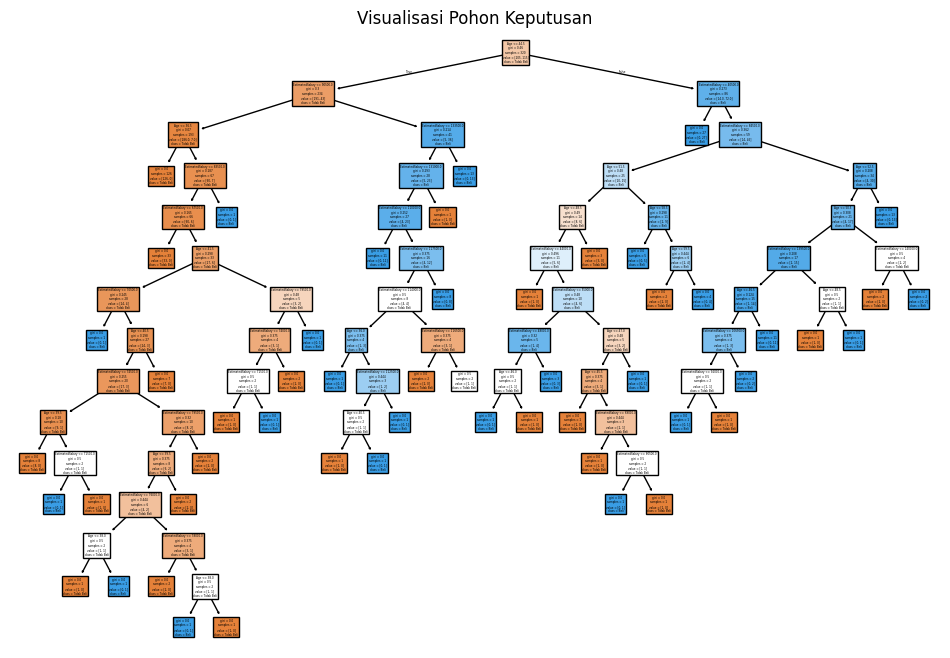

In [ ]:
# 9. Visualisasi pohon keputusan
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=['Age', 'EstimatedSalary'],
          class_names=['Tidak Beli', 'Beli'], filled=True)
plt.title("Visualisasi Pohon Keputusan")
plt.show()


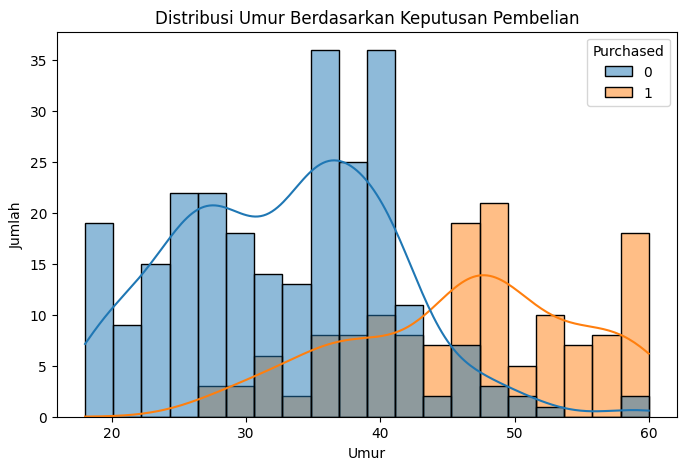

In [ ]:
# Visualisasi distribusi umur berdasarkan apakah membeli atau tidak
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Purchased', kde=True, bins=20)
plt.title('Distribusi Umur Berdasarkan Keputusan Pembelian')
plt.xlabel('Umur')
plt.ylabel('Jumlah')
plt.show()


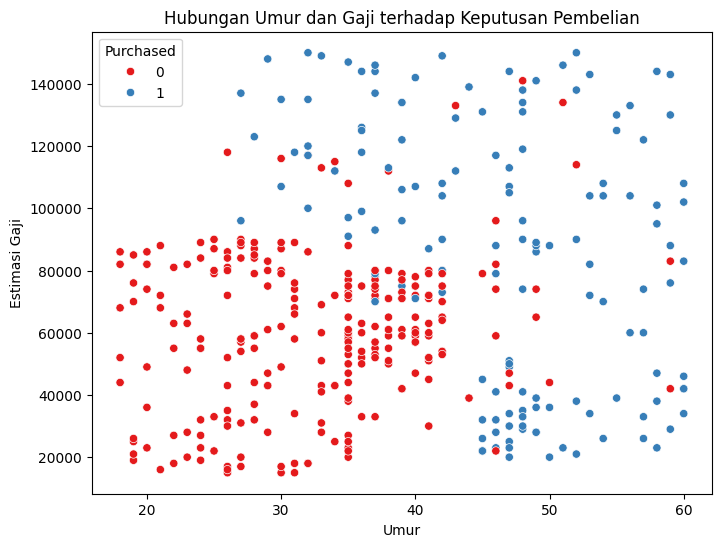

In [ ]:
# Visualisasi scatterplot hubungan Umur vs Gaji
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased', palette='Set1')
plt.title('Hubungan Umur dan Gaji terhadap Keputusan Pembelian')
plt.xlabel('Umur')
plt.ylabel('Estimasi Gaji')
plt.show()


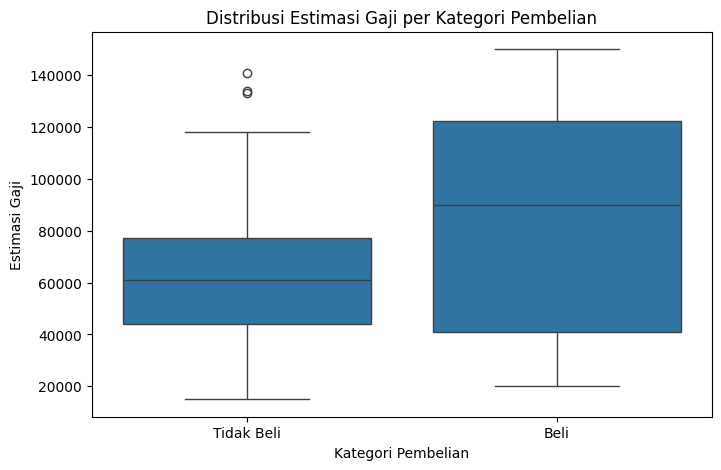

In [ ]:
# Perbandingan distribusi gaji antar pembeli dan tidak
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Purchased', y='EstimatedSalary')
plt.title('Distribusi Estimasi Gaji per Kategori Pembelian')
plt.xticks([0, 1], ['Tidak Beli', 'Beli'])
plt.xlabel('Kategori Pembelian')
plt.ylabel('Estimasi Gaji')
plt.show()
